# notes to reviewer
- For feature selection, in order to obtain a average result of 1000 runs, I think we have to accept the risk of a slightly overfitting by "training" the feature selection model with all our data. Or otherwise, we might not be able to obtain a "list of feature" if we simply train the feature selection model with the same data that we train the prediction model, since the "list" cannot be averaged.

# summary

using python 3.
I've included all the codes in "poi_id.py" here. Basically all the needed components are here.

# Questions
## Q1
Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those? [relevant rubric items: “data exploration”, “outlier investigation”]
## A1
- characteristics of the dataset:
    - 143 observations
    - 12.6% POI (18 observations)
    - 21 vars. 1 dependent, 20 independent.
    - a lot of values are missing: 
        - loan_advances has the most missing value of 140, followed by 126 in restricted_stock_deferred
        - however, I think is safe to assume that most of the missing value can be replace with 0, since it's quite reasonable that they simply don't have that item (e.g. they simply didn't receive "director_fees")
        - but for salary, total_payments and total_stock_value, I think it's not possible that one don't have that. Thus, the missingness might comes from some error in the data gathering process. Since we cannot go back to gather more data, I'm gonna asssume those data are in line with the rest, thus replacing them with the average value (of the rest).
- Goal: The goal is to predict whether someone is a POI or not based on their financial and Email data.
- ML: Since there are ~10 vars ~150 observations, it's hard for human being to find pattern merely by eyes. ML might help us identify interesting vars and even modeling the relationship between vars and POI
- Outlier:
    - I first remove some strange (clearly not human) observations
    - For all the rest, I adjust all those values > mean + 2*stddev, and replace them with the thereshold value
    - For those vars in which it has more > 2 stddev observations, I adjust the thereshold to 3*stddev

## Q2
What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready­made in the dataset explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values. [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]

## A2
- Scaling:
    - Since I planned to use multiple models to predict the result, and some of them (e.g. SVM) might be produce different result to  different scaling, I'll do scaling to make sure I can compare result across all models
    - I use Z score (normalization) as my scaling method
- Feature engineering:
    - I create vars representing whether or not a certain vars is missing. e.g. for observation x, its column y might be missing, so its col_y_null will be 1; otherwise it'll be 0.
    - when we look at the list of selected features, there's actually no features that I created was inputted into the model, which means my feature acutally have no influence on the final model performance
- Feature selection:
    - I first used KBest and Random Forest to select feature, and testing the result with different threshold using different models, and select the best-performing threshold.
    - However, when I tuned decision tree and extra tree, since these tree-based models can select the vars by themselves, I bascially directly input all the vars.
    - the best-performing model is when the treshold is set to 0.015, and the result is as follows:
        - deferred_income 0.0553573593495
        - salary 0.0476692950398
        - shared_receipt_with_poi 0.096232420841
        - restricted_stock 0.0815334687979
        - from_poi_to_this_person 0.0902065725698
        - from_messages 0.0550652980769
        - from_this_person_to_poi 0.0362337855198
        - to_messages 0.030385334109
        - exercised_stock_options 0.0425455730765
        - total_payments 0.0589942371622
        - long_term_incentive 0.0826333345519
        - expenses 0.10066191988
        - total_stock_value 0.0543660103665
        - bonus 0.07250614567
        - other 0.0706239362717


## Q3
What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? [relevant rubric item: “pick an algorithm”]

## A3
- I used the following models:
    - naive bayes
    - decision tree
    - extra tree
    - random forest
    - logistic
    - neural network 
    - SVM
- I split the data by training 70% / validation 30% using SKlearn's module
- The score above the average of the result of 2000 runs
- The naive bayes model bascially outperform all other models.

## Q4
What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune ­­ if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier). [relevant rubric item: “tune the algorithm”]

## A4
- I decided to further tune the the decision tree model and the extra tree model.
- For the decision tree model and the extra-tree model (a sub-category of random forest), I used SKlearn's GridSearch module to perfom parameter tuning. Since decision tree model can perform feature selection itself and therefore not sensitve to input vars, I didn't try out different input vars.

## Q5
What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis? [relevant rubric item: “validation strategy”]

## A5
- If I din't validate, or validating it using the same dataset (not spliting traing/validation), I might get a result that's overfitted, which means it perform well on the current dataset, but poorly on any new data
- I avoid that by using 70%/30% split on training/ validation
- I also run multiple times (2000) to ensure robustness
- StratifiedShuffleSplit is not used when evaluating the performance of a single model, since we're evaluating the model on a model-by-model basis, not evaluating all the models alltogether.
- The primary score I'm looking at is F1 for the following reasons:
    - as a rare event (~10%), it doesn't make sense to look at accuracy
    - an appropriate measure is recall and precision, taking into account the number of event as well as the cost of mis-classfication
    - an average of that is the F1 score

## Q6
Give at least 2 evaluation metrics and your average performance for each of them. Explain an interpretation of your metrics that says something human understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

## A6
- model performance:
    - Accuracy: 0.79813	
    - Precision: 0.31178	
    - Recall: 0.42570	
    - F1: 0.35994	
    - F2: 0.39671
- precision:
    - for all that I labeled POI, there's 31% of them are actually POI
    - which means if I catch 100 people, 69 of them are innocent while 31 of them are guilty
- Recall:
    - for all POIs, I've correctly labeled 42% of them.
    - out of 100 guilty people, I can correctly catch 42 of them.
- the StratifiedShuffleSplit method is used, since it can prevent the overfit problem when we tune the "hyper"parameter (tuning the model parameters). Because when we build tons of models, we might run into the problem of overfitting since one of the model might be just "overfits" your data by chance. The StratifiedShuffleSplit method solves that.

# import packages

In [27]:
import sys
#sys.path.append('/usr/local/lib/python2.7/dist-packages')
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from feature_format import featureFormat, targetFeatureSplit
import tester as ts
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn import svm,linear_model,metrics,tree,neural_network,ensemble,naive_bayes,model_selection,feature_selection
import scipy.stats as sci
import itertools

# loading data

In [168]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [169]:
# converting the dict to a dataframe for further processing
main=pd.DataFrame.from_dict(data_dict)

In [170]:
# converting it to a more readable (and more accustomed to me) format 
main=main.T

# data inspection

In [134]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [135]:
main

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,NaN,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,NaN,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,NaN,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,NaN,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


## notes:
- obviously, "TOTAL" and "THE TRAVEL AGENCY IN THE PARK" must be removed
- for the financial vars, I assume "NaN" means that the person in question don't have any value (0) in that category
- for the Email vars, I also assume make the same assumption except for "email address"
- "LOCKHART EUGENE E" have all his/her value set to "NaN" which is quite weired. I'm gonna assume he/she is not a actual employee therefore drop the value.

In [171]:
main = main.drop("TOTAL")
main = main.drop("LOCKHART EUGENE E")
main = main.drop("THE TRAVEL AGENCY IN THE PARK")

In [172]:
main = main.replace("NaN",np.nan)

In [173]:
main.isnull().sum()

bonus                         62
deferral_payments            105
deferred_income               95
director_fees                127
email_address                 32
exercised_stock_options       42
expenses                      49
from_messages                 57
from_poi_to_this_person       57
from_this_person_to_poi       57
loan_advances                140
long_term_incentive           78
other                         52
poi                            0
restricted_stock              34
restricted_stock_deferred    126
salary                        49
shared_receipt_with_poi       57
to_messages                   57
total_payments                20
total_stock_value             18
dtype: int64

In [174]:
# first record all the missingness of the vars by adding another var
for a in main:
    for b in main.T:
        if main.loc[b,a] == "NaN":
            main.loc[b,a+str("_null")]  = 1
            main.loc[b,a]  = None
        else:
            main.loc[b,a+str("_null")]  = 0

In [175]:
var_replace = [
    'bonus', 'deferral_payments', 'deferred_income', 'director_fees',
    'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'shared_receipt_with_poi',
       'to_messages'
]
for b in var_replace:
    for a in main.T:
        if np.isnan(main.loc[a,b]):
            main.loc[a,b] = 0

In [178]:
# for the rest, which is salary,total_payments,total_stock_value
# I am gonna replace them with avg
for a in main:
    if a != "email_address":
        avg = np.mean(main[a])
        for b in main.T:
            if np.isnan(main.loc[b,a]):
                main.loc[b,a] = avg
            else:
                pass

In [179]:
main.isnull().sum()

bonus                              0
deferral_payments                  0
deferred_income                    0
director_fees                      0
email_address                     32
exercised_stock_options            0
expenses                           0
from_messages                      0
from_poi_to_this_person            0
from_this_person_to_poi            0
loan_advances                      0
long_term_incentive                0
other                              0
poi                                0
restricted_stock                   0
restricted_stock_deferred          0
salary                             0
shared_receipt_with_poi            0
to_messages                        0
total_payments                     0
total_stock_value                  0
bonus_null                         0
deferral_payments_null             0
deferred_income_null               0
director_fees_null                 0
email_address_null                 0
exercised_stock_options_null       0
e

In [113]:
print("total num: ",main["poi"].count())
print("num of poi: ",main["poi"][main["poi"]==True].count())
print("num of non-poi: ",main["poi"][main["poi"]==False].count())

total num:  143
num of poi:  18
num of non-poi:  125


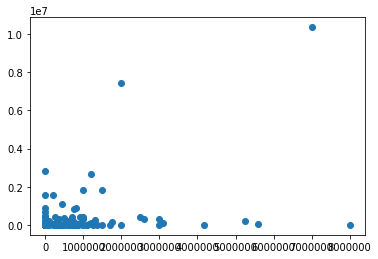

In [9]:
plt.scatter(main["bonus"],main["other"])
plt.show()

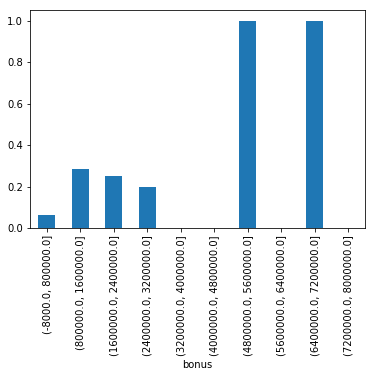

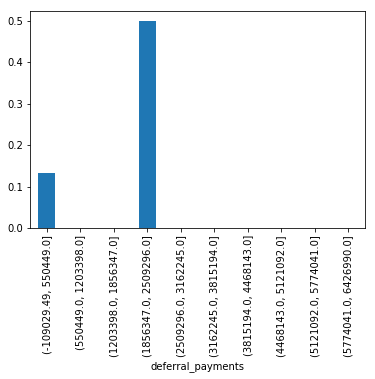

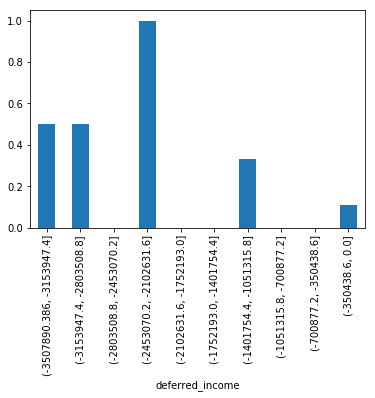

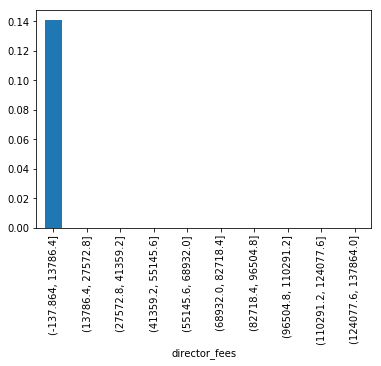

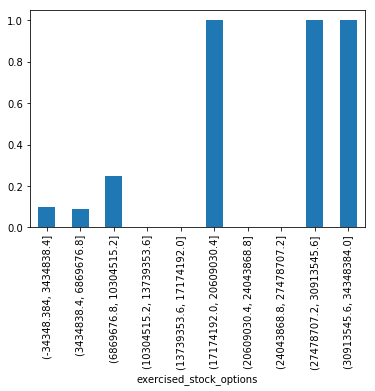

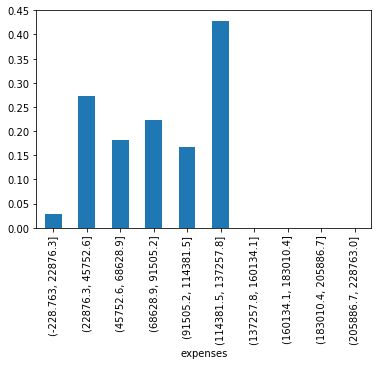

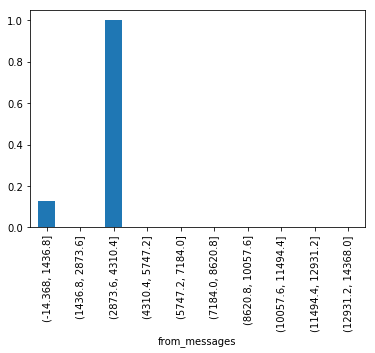

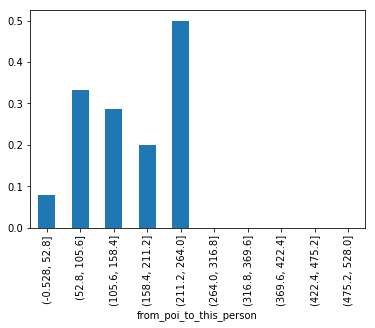

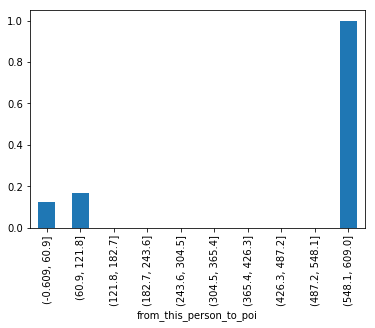

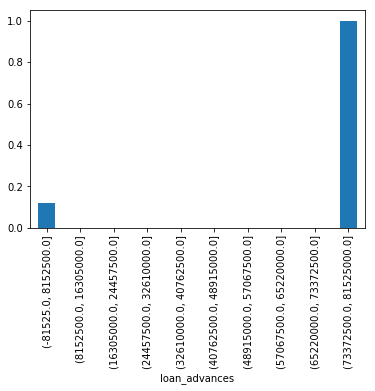

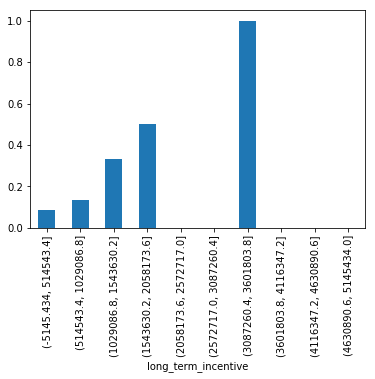

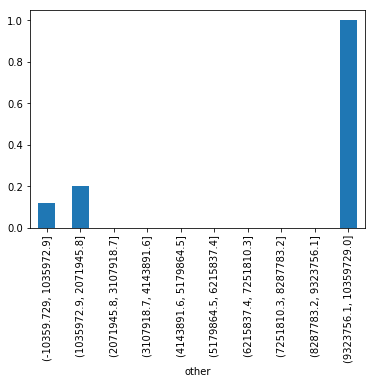

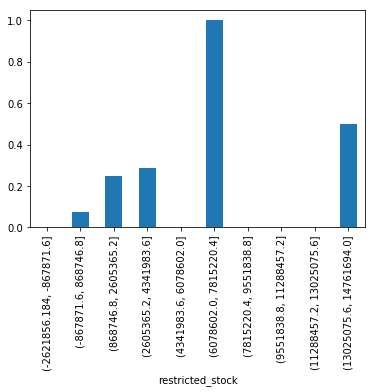

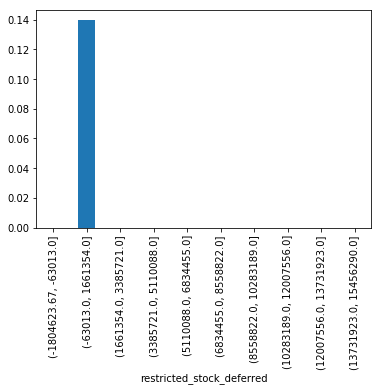

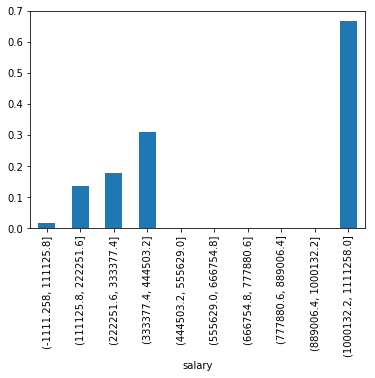

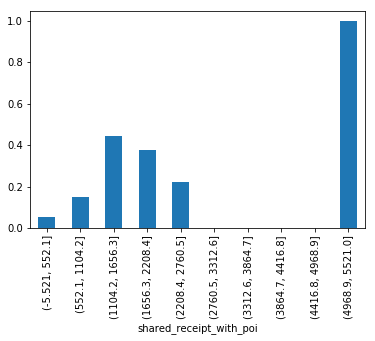

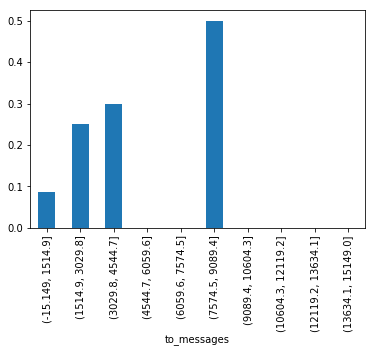

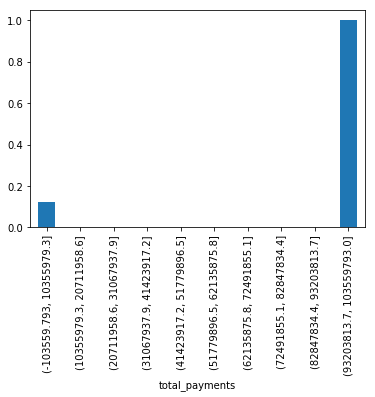

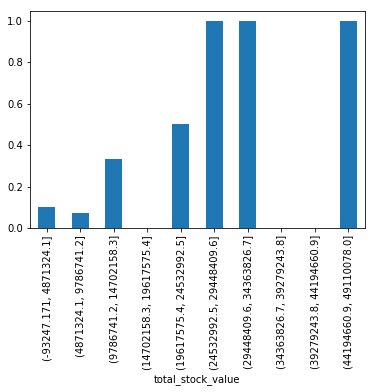

In [10]:
vars_list = ['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
        'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value']
for a in vars_list:
    x_grouped = pd.cut(main[a].astype(int),10)
    main["poi"].groupby(x_grouped).mean().plot(kind = "bar")
    plt.show()

In [11]:
# check if a certain row has >3 columns that are outliers
condition_outlier = []
for a in main.T:
    condition_cnt = 0
    for b in vars_list:
        stddev = np.std(main[b])
        avg = np.mean(main[b])
        if abs((main.loc[a,b]-avg)/stddev)>3:
            condition_cnt+=1
        else:
            pass
    if condition_cnt>3:
        condition_outlier.append(True)
    else:
        condition_outlier.append(False)
main[condition_outlier]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive_null,other_null,poi_null,restricted_stock_null,restricted_stock_deferred_null,salary_null,shared_receipt_with_poi_null,to_messages_null,total_payments_null,total_stock_value_null
BELDEN TIMOTHY N,5249999,2144013,-2334434,0,tim.belden@enron.com,953136,17355,484,228,108,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
FREVERT MARK A,2000000,6426990,-3367011,0,mark.frevert@enron.com,10433518,86987,21,242,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
LAVORATO JOHN J,8000000,0,0,0,john.lavorato@enron.com,4158995,49537,2585,528,411,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
LAY KENNETH L,7000000,202911,-300000,0,kenneth.lay@enron.com,34348384,99832,36,123,16,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
SKILLING JEFFREY K,5600000,0,0,0,jeff.skilling@enron.com,19250000,29336,108,88,30,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## summary
- In this section, I primarily inspected whether there are any strange rows, and if so, remove them.
- In the analysis above, I found 4 rows (obeservations) that have lots of outliers. However, themselves do look like normal data. Therefore I'm not gonna remove them.
- In the graph, we can see that most of the vars are pretty skewed. We might need to take this into account when doing further analysis.

# data processing

In [180]:
# outlier
# input: series, directly changes dataframe, print out num of changed
def remove_outlier(df,name,times,whether):
    avg=np.mean(df[name])
    std=np.std(df[name])
    orig=df.copy()
    temp=df.copy()
    changed=0
    def outlier(num):
        number=0
        if num > avg-times*std and num < avg+times*std:
            return num,0
        elif num > avg+times*std:
            number+=1
            return avg+times*std,1
        else:
            number+=1
            return avg-times*std,1
    for key,value in df[name].iteritems():
        k=0
        if whether:
            df.loc[key,name],k=outlier(value)
        else:
            temp.loc[key,name],k=outlier(value)
        changed+=k
    if whether:
        std_of_changed=np.mean(orig[name]-df[name])/changed
        changed_ornot="Changed!"
    else:
        std_of_changed=np.mean(orig[name]-temp[name])/changed
        changed_ornot="Not Changed!"
    avg_std=std_of_changed/std
    print ("vars: ",name)
    print ("avg:",avg,"; std:",std," std/avg: ",std/avg)
    print ("average exceeding amount: ",std_of_changed)
    print ("average exceeding std: ",avg_std)
    print ("changed ",changed," items")
    print (changed_ornot)

In [181]:
# giving me a list of vars
main.T.index

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'poi', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value', 'bonus_null',
       'deferral_payments_null', 'deferred_income_null', 'director_fees_null',
       'email_address_null', 'exercised_stock_options_null', 'expenses_null',
       'from_messages_null', 'from_poi_to_this_person_null',
       'from_this_person_to_poi_null', 'loan_advances_null',
       'long_term_incentive_null', 'other_null', 'poi_null',
       'restricted_stock_null', 'restricted_stock_deferred_null',
       'salary_null', 'shared_receipt_with_poi_null', 'to_messages_null',
       'total_payments_null', 'total_stock_value_null'],
      dtype='objec

In [182]:
# remove outliers

# since "from_poi_to_this_person" and "from_this_person_to_poi" have greater number of 
# instances that exceeds the 2 std.dev threshold, I decided to make their threshold to
# 3 std.devs. 

for key,value in main.iteritems():
    if key!="email_address" and key!="poi" and key!="from_poi_to_this_person" and key!="from_this_person_to_poi":
        remove_outlier(main,key,2,True)
    elif key=="from_poi_to_this_person":
        remove_outlier(main,key,3,True)
    elif key=="from_this_person_to_poi":
        remove_outlier(main,key,3,True)
    else:
        pass

vars:  bonus
avg: 680724.608392 ; std: 1231849.79887  std/avg:  1.80961549455
average exceeding amount:  20004.025132
average exceeding std:  0.0162390131901
changed  5  items
Changed!
vars:  deferral_payments
avg: 223642.629371 ; std: 753870.971081  std/avg:  3.37087331338
average exceeding amount:  9413.73426501
average exceeding std:  0.0124871955893
changed  7  items
Changed!
vars:  deferred_income
avg: -195037.699301 ; std: 605793.142316  std/avg:  -3.10603101087
average exceeding amount:  -11707.3805319
average exceeding std:  -0.0193257066054
changed  5  items
Changed!
vars:  director_fees
avg: 10050.1118881 ; std: 31289.3685218  std/avg:  3.11333534095
average exceeding amount:  273.789517961
average exceeding std:  0.00875024108492
changed  12  items
Changed!
vars:  exercised_stock_options
avg: 2090318.07692 ; std: 4792348.38723  std/avg:  2.29264074216
average exceeding amount:  85521.2807595
average exceeding std:  0.0178453805628
changed  5  items
Changed!
vars:  expenses
a

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


vars:  deferral_payments_null
avg: 0.0 ; std: 0.0  std/avg:  nan
average exceeding amount:  0.0
average exceeding std:  nan
changed  143  items
Changed!
vars:  deferred_income_null
avg: 0.0 ; std: 0.0  std/avg:  nan
average exceeding amount:  0.0
average exceeding std:  nan
changed  143  items
Changed!
vars:  director_fees_null
avg: 0.0 ; std: 0.0  std/avg:  nan
average exceeding amount:  0.0
average exceeding std:  nan
changed  143  items
Changed!
vars:  email_address_null
avg: 0.0 ; std: 0.0  std/avg:  nan
average exceeding amount:  0.0
average exceeding std:  nan
changed  143  items
Changed!
vars:  exercised_stock_options_null
avg: 0.0 ; std: 0.0  std/avg:  nan
average exceeding amount:  0.0
average exceeding std:  nan
changed  143  items
Changed!
vars:  expenses_null
avg: 0.0 ; std: 0.0  std/avg:  nan
average exceeding amount:  0.0
average exceeding std:  nan
changed  143  items
Changed!
vars:  from_messages_null
avg: 0.0 ; std: 0.0  std/avg:  nan
average exceeding amount:  0.0
ave

# feature extraction

In [183]:
# gives me a overview of the indexs
main.T.index

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'poi', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value', 'bonus_null',
       'deferral_payments_null', 'deferred_income_null', 'director_fees_null',
       'email_address_null', 'exercised_stock_options_null', 'expenses_null',
       'from_messages_null', 'from_poi_to_this_person_null',
       'from_this_person_to_poi_null', 'loan_advances_null',
       'long_term_incentive_null', 'other_null', 'poi_null',
       'restricted_stock_null', 'restricted_stock_deferred_null',
       'salary_null', 'shared_receipt_with_poi_null', 'to_messages_null',
       'total_payments_null', 'total_stock_value_null'],
      dtype='objec

# Normalize data

In [184]:
def normalizing(df,col):
    try:
        avg = np.mean(df[col])
        std = np.std(df[col])
    except:
        pass
    
    for key,value in df[col].iteritems():
        try:
            if col.find("_null") ==-1:
                df.loc[key,col] = (df.loc[key,col]-avg)/std
        except:
            pass

In [185]:
main_normal = main.copy()
for a in main.T.index:
    if a !="poi":
        normalizing(main_normal,a)
print(main_normal)

                                bonus  deferral_payments  deferred_income  \
ALLEN PHILLIP K              3.143391           3.760458        -3.697760   
BADUM JAMES P               -0.712005           0.050741         0.397400   
BANNANTINE JAMES M          -0.712005          -0.376960         0.382541   
BAXTER JOHN C                0.759322           2.719412        -3.637877   
BAY FRANKLIN R              -0.221563           0.245438        -0.189645   
BAZELIDES PHILIP J          -0.712005           1.259225         0.397400   
BECK SALLY W                 0.146269          -0.376960         0.397400   
BELDEN TIMOTHY N             3.143391           3.760458        -3.697760   
BELFER ROBERT               -0.712005          -0.621900         0.397400   
BERBERIAN DAVID             -0.712005          -0.376960         0.397400   
BERGSIEKER RICHARD P        -0.405479          -0.376960        -1.016966   
BHATNAGAR SANJAY            -0.712005          -0.376960         0.397400   

# loading data

In [199]:
# features list is a full list of all feature, is used in previous model-building
# however, I found out that selected features perform better.
# So I used the previous method (mutual value) to select the features that I need.
features_list = ["poi",'bonus', 'deferral_payments', 'deferred_income', 'director_fees',
        'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value', 'bonus_null',
       'deferral_payments_null', 'deferred_income_null', 'director_fees_null',
       'email_address_null', 'exercised_stock_options_null', 'expenses_null',
       'from_messages_null', 'from_poi_to_this_person_null',
       'from_this_person_to_poi_null', 'loan_advances_null',
       'long_term_incentive_null', 'other_null', 'poi_null',
       'restricted_stock_null', 'restricted_stock_deferred_null',
       'salary_null', 'shared_receipt_with_poi_null', 'to_messages_null',
       'total_payments_null', 'total_stock_value_null']
data = featureFormat(main_normal.T, features_list)
labels, features = targetFeatureSplit(data)

# feature selection

In [187]:
#data = featureFormat(main_normal.T, x_list, sort_keys = True)
#y, x = targetFeatureSplit(data)

In [188]:
def top_x_vars(top):
    test = np.vectorize(abs)
    features_pos = test(features)
    x_new = sk.feature_selection.SelectKBest(sk.feature_selection.chi2,k=top).fit(features_pos,labels)
    x_vars_mask = x_new.get_support()
    x_without = features_list[1:]
    filtered = itertools.compress(x_without,x_vars_mask)
    x_list = ["poi"]
    for a in filtered:
        x_list.append(a)
    data = featureFormat(main_normal.T, x_list, sort_keys = True)
    y, x = targetFeatureSplit(data)
    return x,y,x_list

In [189]:
def feature_select_rf(th_vars):
    x_new = sk.feature_selection.SelectFromModel(ensemble.RandomForestClassifier(),threshold = th_vars).fit(features,labels)
    x_vars_mask = x_new.get_support()
    x_without = features_list[1:]
    filtered = itertools.compress(x_without,x_vars_mask)
    x_list = ["poi"]
    for a in filtered:
        x_list.append(a)
    data = featureFormat(main_normal.T, x_list, sort_keys = True)
    y, x = targetFeatureSplit(data)
    return x,y,x_list

# model building

Basically, I first tried all the models that I'm familar with using the selected feature list. Then, I use the GridSearchCV module to optimize the result.
However in this case, Decision Tree has already reached a perfect result with default setting. So though I'll still try to optimze two other models that also performs quite well, the final model I'm gonna use will still be decision tree.

In [44]:
model_dt=tree.DecisionTreeClassifier()

In [45]:
model_log=linear_model.LogisticRegression()

In [46]:
model_rf=ensemble.RandomForestClassifier()

In [47]:
model_et=ensemble.ExtraTreesClassifier()

In [48]:
model_nb=naive_bayes.GaussianNB()

In [49]:
model_svm=svm.SVC()

In [50]:
model_neu=neural_network.MLPClassifier(hidden_layer_sizes=[50],max_iter=2000)

# model validation

In [190]:
def validate_model(model,x,y,trial):
    TP = []
    TN = []
    FP = []
    FN = []
    i = 0
    while i <= trial:
        x_train,x_test,y_train,y_test = sk.model_selection.train_test_split(x,y,test_size = 0.3)
        model.fit(x_train,y_train)
        y_test_predicted = model.predict(x_test)
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for a in range(0,len(y_test)):
            if y_test[a]==1 and y_test_predicted[a]==1:
                true_positive +=1
            elif y_test[a]==0 and y_test_predicted[a]==0:
                true_negative +=1
            elif y_test[a]==0 and y_test_predicted[a]==1:
                false_positive +=1
            elif y_test[a]==1 and y_test_predicted[a]==0:
                false_negative +=1
        TP.append(true_positive)
        TN.append(true_negative)
        FP.append(false_positive)
        FN.append(false_negative)
        i +=1
    true_positive = sum(TP)
    true_negative = sum(TN)
    false_positive = sum(FP)
    false_negative = sum(FN)
    
    total = true_positive + true_negative + false_positive + false_negative
    try:
        precision = true_positive/(false_positive+true_positive)
        recall = true_positive/(true_positive+false_negative)
        f1 = recall*precision*2/(recall+precision)
    except:
        precision = None
        recall = None
        f1 = None
    try:
        print("TP:",true_positive)
        print("TN:",true_negative)
        print("FP:",false_positive)
        print("FN:",false_negative)
        print("Precision:",("%.2f" % round(precision,2)))
        print("Recall:",("%.2f" % round(recall,2)))
        print("F1:",("%.2f" % round(f1,2)))
    except:
        print("error!")

In [191]:
for a in [5,10,15,20,25,30]:
    x,y,x_list = top_x_vars(a)
    print("using",a,"vars")
    print("tree:")
    validate_model(model_dt,x,y,1000)
    print("---")
    print("Naive Bayes:")
    validate_model(model_nb,x,y,1000)
    print("---")
    print("log:")
    validate_model(model_log,x,y,1000)
    print("---")
    print("random forest:")
    validate_model(model_rf,x,y,1000)
    print("---")
    print("extra tree:")
    validate_model(model_et,x,y,1000)
    print("---")
    print("svm:")
    validate_model(model_svm,x,y,1000)
    print("-------------")

using 5 vars
tree:
TP: 1144
TN: 32974
FP: 4746
FN: 4179
Precision: 0.19
Recall: 0.21
F1: 0.20
---
Naive Bayes:
TP: 2700
TN: 25732
FP: 11877
FN: 2734
Precision: 0.19
Recall: 0.50
F1: 0.27
---
log:
TP: 581
TN: 36659
FP: 973
FN: 4830
Precision: 0.37
Recall: 0.11
F1: 0.17
---
random forest:
TP: 781
TN: 36096
FP: 1502
FN: 4664
Precision: 0.34
Recall: 0.14
F1: 0.20
---
extra tree:
TP: 665
TN: 36109
FP: 1572
FN: 4697
Precision: 0.30
Recall: 0.12
F1: 0.18
---
svm:
TP: 19
TN: 37046
FP: 658
FN: 5320
Precision: 0.03
Recall: 0.00
F1: 0.01
-------------
using 10 vars
tree:
TP: 1442
TN: 33075
FP: 4564
FN: 3962
Precision: 0.24
Recall: 0.27
F1: 0.25
---
Naive Bayes:
TP: 3958
TN: 19111
FP: 18457
FN: 1517
Precision: 0.18
Recall: 0.72
F1: 0.28
---
log:
TP: 882
TN: 36178
FP: 1466
FN: 4517
Precision: 0.38
Recall: 0.16
F1: 0.23
---
random forest:
TP: 810
TN: 36293
FP: 1406
FN: 4534
Precision: 0.37
Recall: 0.15
F1: 0.21
---
extra tree:
TP: 639
TN: 36157
FP: 1504
FN: 4743
Precision: 0.30
Recall: 0.12
F1: 0.17

In [194]:
for a in [0.005,0.01,0.015,0.02,0.025,0.03,0.05]:
    x,y,x_list = feature_select_rf(a)
    print("using",a,"vars")
    print("tree:")
    validate_model(model_dt,x,y,1000)
    print("---")
    print("Naive Bayes:")
    validate_model(model_nb,x,y,1000)
    print("---")
    print("log:")
    validate_model(model_log,x,y,1000)
    print("---")
    print("random forest:")
    validate_model(model_rf,x,y,1000)
    print("---")
    print("extra tree:")
    validate_model(model_et,x,y,1000)
    print("---")
    print("svm:")
    validate_model(model_svm,x,y,1000)
    print("-------------")

using 0.005 vars
tree:
TP: 1321
TN: 33202
FP: 4432
FN: 4088
Precision: 0.23
Recall: 0.24
F1: 0.24
---
Naive Bayes:
TP: 4198
TN: 15483
FP: 22198
FN: 1164
Precision: 0.16
Recall: 0.78
F1: 0.26
---
log:
TP: 1016
TN: 34909
FP: 2655
FN: 4463
Precision: 0.28
Recall: 0.19
F1: 0.22
---
random forest:
TP: 680
TN: 36122
FP: 1508
FN: 4733
Precision: 0.31
Recall: 0.13
F1: 0.18
---
extra tree:
TP: 735
TN: 36252
FP: 1465
FN: 4591
Precision: 0.33
Recall: 0.14
F1: 0.20
---
svm:
TP: 2
TN: 37592
FP: 34
FN: 5415
Precision: 0.06
Recall: 0.00
F1: 0.00
-------------
using 0.01 vars
tree:
TP: 1286
TN: 32980
FP: 4596
FN: 4181
Precision: 0.22
Recall: 0.24
F1: 0.23
---
Naive Bayes:
TP: 1951
TN: 32118
FP: 5515
FN: 3459
Precision: 0.26
Recall: 0.36
F1: 0.30
---
log:
TP: 768
TN: 34992
FP: 2729
FN: 4554
Precision: 0.22
Recall: 0.14
F1: 0.17
---
random forest:
TP: 652
TN: 36189
FP: 1492
FN: 4710
Precision: 0.30
Recall: 0.12
F1: 0.17
---
extra tree:
TP: 653
TN: 36217
FP: 1360
FN: 4813
Precision: 0.32
Recall: 0.12
F1:

In [ ]:
validate_model(model_neu,x,y,2000)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:565: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


It seems like the naive bayes model performs the best with the following best result:
- Precision: 0.30
- Recall: 0.39
- F1: 0.34
under the codition of using the Random Forest model to select feature with a 0.015 importance threshold.

However, I decided to give another two models which also perform quite good, namely the Decision Tree model and the Extra Tree model a try.

# model tuning

## Decision Tree

In [102]:
para_dt={"criterion":("gini","entropy"),"max_depth":(5,10,20,50)}
model_dt_gs=model_selection.GridSearchCV(model_dt,para_dt)

In [103]:
model_dt_gs.fit(features,labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 10, 20, 50), 'criterion': ('gini', 'entropy')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [104]:
model_dt_gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [105]:
model_dt_tuned=tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [106]:
validate_model(model_dt_tuned,features,labels,2000)
ts.test_classifier(model_dt_tuned,main_normal.T,features_list,folds = 2000)

TP: 2681
TN: 66123
FP: 9167
FN: 8072
Precision: 0.23
Recall: 0.25
F1: 0.24
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.79953	Precision: 0.24532	Recall: 0.24250	F1: 0.24390	F2: 0.24306
	Total predictions: 30000	True positives:  970	False positives: 2984	False negatives: 3030	True negatives: 23016



### result 
the best result using the GridSearch method is as follows:
- using my own validation function - 
    - Precision: 0.23 ; 
    - Recall: 0.19 ;
    - F1: 0.21
- using udacity's test.py - 
    - Precision: 0.28417 ; 
    - Recall: 0.21050 ; 
    - F1: 0.24185

## Extra Tree

In [107]:
para_et={"criterion":("gini","entropy"),"max_depth":(5,10,20,50),"n_estimators":(5,10,50,100,200,500)}
model_et_gs=model_selection.GridSearchCV(model_et,para_et)

In [108]:
model_et_gs.fit(features,labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 10, 20, 50), 'criterion': ('gini', 'entropy'), 'n_estimators': (5, 10, 50, 100, 200, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [110]:
model_et_gs.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=50, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [111]:
model_et_tuned=ensemble.ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=50, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [112]:
validate_model(model_et_tuned,features,labels,2000)
ts.test_classifier(model_et_tuned,main_normal.T,features_list,folds = 2000)

TP: 2211
TN: 73095
FP: 2191
FN: 8546
Precision: 0.50
Recall: 0.21
F1: 0.29
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=50, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
	Accuracy: 0.87783	Precision: 0.60528	Recall: 0.24075	F1: 0.34448	F2: 0.27372
	Total predictions: 30000	True positives:  963	False positives:  628	False negatives: 3037	True negatives: 25372



### result 
the best result using the GridSearch method is as follows:
- using my own validation function - 
    - Precision: 0.34 ; 
    - Recall: 0.10 ;
    - F1: 0.15
- using udacity's test.py - 
    - Precision: 0.31971 ; 
    - Recall: 0.06650 ; 
    - F1: 0.11010

# conclusion

The Naive Bayes model performs best under the following condition:
- use sklearn's SelectFromModel module to select features by using random forest
- the threshold set to 0.02

# final data dumping

In [220]:
feature_selection_final = ensemble.RandomForestClassifier()
feature_selection_final.fit(features,labels)
f_importance = feature_selection_final.feature_importances_

In [221]:
feature_list_result = {}
for a in range(0,len(f_importance)):
    feature_list_result.update({features_list[a+1]:f_importance[a]})

In [222]:
vars_final = ["poi"]
for key,value in feature_list_result.items():
    if value>0.015:
        print(key,value)
        vars_final.append(key)

deferred_income 0.0689481603552
salary 0.100317826521
shared_receipt_with_poi 0.0568161939433
restricted_stock 0.0367043578308
from_poi_to_this_person 0.101300332749
from_messages 0.054367330975
from_this_person_to_poi 0.0253585964572
to_messages 0.0533638716887
exercised_stock_options 0.0988254856979
deferral_payments 0.01715165515
total_payments 0.0543694801636
long_term_incentive 0.0363000073035
expenses 0.0333049295379
total_stock_value 0.113172584814
bonus 0.074094155467
other 0.0756050313456


In [219]:
# final validation
ts.test_classifier(model_nb,main_normal.T,vars_final,folds = 5000)

GaussianNB(priors=None)
	Accuracy: 0.79813	Precision: 0.31178	Recall: 0.42570	F1: 0.35994	F2: 0.39671
	Total predictions: 75000	True positives: 4257	False positives: 9397	False negatives: 5743	True negatives: 55603



In [223]:
with open("my_classifier.pkl", "wb") as clf_outfile:
    pickle.dump(model_nb, clf_outfile)
with open("my_dataset.pkl", "wb") as dataset_outfile:
    pickle.dump(main_normal.T, dataset_outfile)
with open("my_feature_list.pkl", "wb") as featurelist_outfile:
    pickle.dump(vars_final, featurelist_outfile)

# backup code

This area is the original udacity code. Just saving it here for reference.

In [ ]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
clf = GaussianNB()

In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [90]:
def validate_model_and_feature_using_rf(model,x,y,trial,f_threshold):
    TP = []
    TN = []
    FP = []
    FN = []
    i = 0
    while i <= trial:
        x_train,x_test,y_train,y_test = sk.model_selection.train_test_split(x,y,test_size = 0.3)
        x_train_final,y_train_final = feature_select_rf(f_threshold,x_train,y_train)
        model.fit(x_train_final,y_train_final)
        y_test_predicted = model.predict(x_test)
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for a in range(0,len(y_test)):
            if y_test[a]==1 and y_test_predicted[a]==1:
                true_positive +=1
            elif y_test[a]==0 and y_test_predicted[a]==0:
                true_negative +=1
            elif y_test[a]==0 and y_test_predicted[a]==1:
                false_positive +=1
            elif y_test[a]==1 and y_test_predicted[a]==0:
                false_negative +=1
        TP.append(true_positive)
        TN.append(true_negative)
        FP.append(false_positive)
        FN.append(false_negative)
        i +=1
    true_positive = sum(TP)
    true_negative = sum(TN)
    false_positive = sum(FP)
    false_negative = sum(FN)
    
    total = true_positive + true_negative + false_positive + false_negative
    try:
        precision = true_positive/(false_positive+true_positive)
        recall = true_positive/(true_positive+false_negative)
        f1 = recall*precision*2/(recall+precision)
    except:
        precision = None
        recall = None
        f1 = None
    try:
        print("TP:",true_positive)
        print("TN:",true_negative)
        print("FP:",false_positive)
        print("FN:",false_negative)
        print("Precision:",("%.2f" % round(precision,2)))
        print("Recall:",("%.2f" % round(recall,2)))
        print("F1:",("%.2f" % round(f1,2)))
    except:
        print("error!")